In [1]:
import sqlite3

In [2]:
db=sqlite3.connect('school.sqlite')
db

In [3]:
cur=db.cursor()
cur

In [4]:
sql_query='create table student(rollno int Primary key,name Text,age int)'
cur.execute(sql_query)

In [5]:
cur.execute('Insert into student values (101,"Prince",1)')

In [6]:
db.commit()

In [7]:
cur.execute('Insert into student values (102,"Tony",4)')


In [8]:
db.commit()

In [9]:
db.close()

In [10]:
########################################################################
import sqlite3

In [11]:
db=sqlite3.connect('employee_detail.sqlite')

In [12]:
cur=db.cursor()

In [13]:
cur.execute('create table employees (emp_id int Primary key,Name Text,age int,department Text,salary int)')

In [14]:
cur.execute('Insert into employees values(100,"Rishav",25,"Marketing",50000)')

In [15]:
db.commit()

In [16]:
cur.execute('Insert into employees values(101,"Abhishek",26,"Operation",60000)')
cur.execute('Insert into employees values(102,"Aman",24,"Human Resource",75000)')
db.commit()

In [17]:
def insertinTable(name,age,salary,emp_id,dept):
    cur.execute('Insert into employees values(?,?,?,?,?)',(emp_id,name,age,dept,salary))
    db.commit()
name=str(input())
age=int(input())
emp_id=int(input())
salary=int(input())
dept=str(input())
insertinTable(name,age,salary,emp_id,dept)

Prince
23
007
100000000
Entrepreneur


In [20]:
db.close()

In [22]:
###################################################################
#using school database
db=sqlite3.connect('school.sqlite')
cur=db.cursor()

In [26]:
#to insert multiple rows 
value=[(103,"Bruce",29),(104,"Steve",31),(105,"Scott",27),(106,"Peter",24),(107,"stephen",29),(108,"Barton",27)]
cur.executemany('insert into student values(?,?,?)',value)
db.commit()

In [31]:
cur.execute('Update student set age=25 where rollno=106')
db.commit()

In [35]:
#as an argument
new_age=(50,) #in form of tupple
cur.execute('Update student set age=? where rollno=108',new_age)
db.commit()
db.close()

In [36]:
##################
db=sqlite3.connect('employee_detail.sqlite')
cur=db.cursor()
cur.execute('delete from employees where emp_id=101')


In [37]:
db.commit()

In [43]:
emp_id=[(100,),(7,)]
cur.executemany('delete from employees where emp_id=?',emp_id)
db.commit()
cur.execute('Insert into employees values(100,"Rishav",25,"Marketing",50000)')
db.commit()
db.close()

In [61]:
#####################################################
employee_id=[101,102,103,104,105,106,107,108,109,110,111,112]
name=['Aadarsh','Aarti','Siddharth','Aman','Amit','Shivansh','Vaibhav','Himanshu','Raman','Kunal','Adhira','Tanya']
age=[25,27,25,24,30,26,23,26,25,26,29,24]
department=['Marketing','Operations','Finance','Human Resource','Marketing','IT','Finance','IT','Operations','Marketing','Human Resource','Marketing']
salary=[50000,60000,85000,75000,50000,90000,85000,90000,60000,50000,75000,50000]

l1=[]
for i in range(12):
    tupp=(employee_id[i],name[i],age[i],department[i],salary[i])
    l1.append(tupp)
import sqlite3
db=sqlite3.connect('Employee.sqlite')
cur=db.cursor()
cur.execute('create table Employee_Detail(emp_id int Primary key,Name Text,Age int,Department Text,Salary int) ')

cur.executemany('insert into Employee_Detail values(?,?,?,?,?)',l1)
db.commit()
print("Done")
cur.execute('select emp_id from Employee_Detail where department="Finance"')
l2=cur.fetchall()
for i in range(len(l2)):
    print(l2[i][0])



OperationalError: table Employee_Detail already exists

In [47]:
########################fetching data
db=sqlite3.connect('school.sqlite')
cur=db.cursor()
cur.execute('select * from student')


#method 1
for row in cur:
    print(row)

(101, 'Prince', 23)
(102, 'Tony', 4)
(103, 'Bruce', 29)
(104, 'Steve', 31)
(105, 'Scott', 27)
(106, 'Peter', 25)
(107, 'stephen', 29)
(108, 'Barton', 50)


In [51]:
#method 2 by using fetchone(),fetchmany(),fetchall()
#fetchone()
cur.execute('select * from student')
print(cur.fetchone()) #fetching one row -1st row
print(cur.fetchone()) #fetching one row- 2nd row




(101, 'Prince', 23)
(102, 'Tony', 4)


In [54]:
#fetchmany(n) by default n is 1
cur.execute('select * from student')
print(cur.fetchmany(3)) #fetching starting 3 rows
print(cur.fetchmany(4)) #fetching another 4 row 
#we can also save them in list

[(101, 'Prince', 23), (102, 'Tony', 4), (103, 'Bruce', 29)]
[(104, 'Steve', 31), (105, 'Scott', 27), (106, 'Peter', 25), (107, 'stephen', 29)]


In [57]:
#fetchall() -fetch all the rows
cur.execute('select * from student')
print(cur.fetchall()) #fetch all the rows
cur.execute('select * from student where name like "B%"')
l1=cur.fetchall() #list of tupples where a tupple represent data of a row
l1

[(101, 'Prince', 23), (102, 'Tony', 4), (103, 'Bruce', 29), (104, 'Steve', 31), (105, 'Scott', 27), (106, 'Peter', 25), (107, 'stephen', 29), (108, 'Barton', 50)]


[(103, 'Bruce', 29), (108, 'Barton', 50)]

In [59]:
db.close()

In [69]:
cur.execute('select distinct Department,count(Department) from Employee_Detail group by Department')
l1=cur.fetchall()
for i in range(len(l1)):
    print(l1[i][0],l1[i][1])


Finance 2
Human Resource 2
IT 2
Marketing 4
Operations 2


[('Finance', 2),
 ('Human Resource', 2),
 ('IT', 2),
 ('Marketing', 4),
 ('Operations', 2)]

In [70]:
db.close()

In [71]:
#sqlite with pandas
db=sqlite3.connect('school.sqlite')
#we dont need cursor object while using dataframe
import pandas as pd
df=pd.read_sql_query("select * from student",db)
df


,rollno,name,age
0,101,Prince,23
1,102,Tony,4
2,103,Bruce,29
3,104,Steve,31
4,105,Scott,27
5,106,Peter,25
6,107,stephen,29
7,108,Barton,50


In [72]:
df1=pd.DataFrame([[101,"Prince Dubey","CSE",1000000000],[102,"Tony","Maths",100000],[103,"Steve","chemistry",30000]],columns=["ID","Name","Course","Salary"])
df1

,ID,Name,Course,Salary
0,101,Prince Dubey,CSE,1000000000
1,102,Tony,Maths,100000
2,103,Steve,chemistry,30000


In [73]:
#to conver df1 in table and add in database
df1.to_sql("faculty",db)

In [76]:
#to add a new column and reflect back in database
df["Test"]="Pass"

df.to_sql("student",db,if_exists="replace")
df

,rollno,name,age,Test
0,101,Prince,23,Pass
1,102,Tony,4,Pass
2,103,Bruce,29,Pass
3,104,Steve,31,Pass
4,105,Scott,27,Pass
5,106,Peter,25,Pass
6,107,stephen,29,Pass
7,108,Barton,50,Pass


In [79]:
#add a row at the at index
df.loc[len(df.index)]=[109,"Thor",1500,"Compartment"]
df.to_sql("student",db,if_exists="replace")
df

,rollno,name,age,Test
0,101,Prince,23,Pass
1,102,Tony,4,Pass
2,103,Bruce,29,Pass
3,104,Steve,31,Pass
4,105,Scott,27,Pass
5,106,Peter,25,Pass
6,107,stephen,29,Pass
7,108,Barton,50,Pass
8,109,Thor,1500,Compartment
9,109,Thor,1500,Compartment


In [119]:
##########################################################
import sqlite3
import pandas as pd

db=sqlite3.connect('IMDB.sqlite')

df=pd.read_sql_query("select distinct genre,count(genre) from genre group by genre order by count(genre) dESC",db)
index=df[df["genre"]==""].index.values
df.drop(index[0],inplace=True)
d={}
#or i in df.index:
#   print(df.iloc[i][0],df.iloc[i,1])
genre=list(df["genre"])
count_g=list(df["count(genre)"])

for i in range(len(genre)):
    print(genre[i],count_g[i])



Drama 77
Adventure 43
Action 33
Comedy 31
Biography 21
Sci-Fi 18
Thriller 14
Romance 13
Animation 13
Crime 11
Mystery 7
Fantasy 7
History 6
Sport 3
Music 3
Family 3
Western 2
War 2
Horror 2
Musical 1


In [132]:
#############################################################################
df=pd.read_sql_query("select earning.Movie_id,rating,Domestic,Worldwide from earning join IMDB on earning.Movie_id=IMDB.Movie_id",db)
df["total"]=df["Domestic"]+df["Worldwide"]
maxi=df["total"].max()
ind=df[df["total"]==maxi].index.values
print(df.iloc[ind[0],1])


8.1

In [169]:
############################################3
df=pd.read_sql_query("select title,rating,TotalVotes from IMDB",db)
maxi=df["TotalVotes"].max()
ind=df[df["TotalVotes"]==maxi].index.values
print(df.iloc[ind[0],0],df.iloc[ind[0],1])



Inception (2010) 8.8


In [183]:
df=pd.read_sql_query("select title,Runtime from IMDB",db)
def getNumeric(rt):
    if rt=="":
        return 0
    return int(str(rt).split()[0].strip())
df["Runtime"]=df["Runtime"].apply(getNumeric)
maxi=df["Runtime"].max()
l1=df[df["Runtime"]==maxi].values
print(l1[0][0],l1[0][1])

The Wolf of Wall Street (2013) 180


In [189]:
#########################################################3
df=pd.read_sql_query("select Title,Domestic,Worldwide,Budget from earning join IMDB on earning.Movie_id=IMDB.Movie_id",db)
def getNumeric(bg):
    if bg=="":
        return 0
    return int(float(bg))
df["Budget"]=df["Budget"].apply(getNumeric)
df["Profit"]=df["Domestic"]+df["Worldwide"]-df["Budget"]
maxi=df["Profit"].max()
l1=df[df["Profit"]==maxi].values
print(l1[0][0])

Star Wars: The Force Awakens (2015)


In [192]:
###################################################################
df=pd.read_sql_query("select Title,Domestic,Worldwide,Budget from earning join IMDB on earning.Movie_id=IMDB.Movie_id",db)
def getNumeric(bg):
    if bg=="":
        return 10**9
    return int(float(bg))
df["Budget"]=df["Budget"].apply(getNumeric)
df["Profit"]=df["Domestic"]+df["Worldwide"]-df["Budget"]
mini=df["Budget"].min()
l1=df[df['Budget']==mini].values
if(len(l1[0])==1):
    print(l1[0][0])
else:
    if l1[0][4]>=l1[1][4]:
        print(l1[0][0])
    else:
        print(l1[1][0])
        

Short Term 12 (2013)


In [2]:
###########################################################################################
import pandas as pd

import sqlite3

import numpy as np

db=sqlite3.connect('IMDB.sqlite')
imdb=pd.read_sql_query("Select * from IMDB",db)

earning=pd.read_sql_query("Select * from earning",db)

genre=pd.read_sql_query("Select * from genre",db)

imdb_earning=pd.merge(imdb,earning,on='Movie_id')

imdb_earning['Domestic'].replace('',0,inplace=True)

imdb_earning['Worldwide'].replace('',0,inplace=True)

imdb_earning['Total Earning']=imdb_earning['Domestic']+imdb_earning['Worldwide']

def findYear(title):

    return int(title.split('(')[-1][:-1])

imdb_earning['Year']=imdb_earning['Title'].apply(findYear)

year=sorted(imdb_earning['Year'].value_counts().index)

for i in range(len(year)):

    earning=max(imdb_earning[imdb_earning['Year']==year[i]]['Total Earning'])

    print(year[i],imdb_earning[imdb_earning['Total Earning']==earning]['Title'].values[0])

2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


In [41]:
df=pd.read_sql_query("select Title,Domestic,Worldwide from IMDB join earning on earning.Movie_id=IMDB.Movie_id ",db)
df['Profit']=df['Domestic']+df['Worldwide']
def getYear(yr):
    year=yr.split('(')
    getyr=year[len(year)-1].replace(')',"").strip()
    return int(getyr)
df['Year']=df['Title'].apply(getYear)
mini=df['Year'].min()
maxi=df['Year'].max()
for i in range(mini,maxi+1,1):
    m=df[df['Year']==i].Profit.max()
    print(i,df[(df['Year']==i) & (df['Profit']==m)].iloc[0,0])
    
    



2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


In [42]:
###########################################################################################
mport pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
db = sqlite3.connect('IMDB.sqlite')
df = pd.read_sql_query('Select genre,Budget from IMDB join genre on IMDB.Movie_id = genre.Movie_id',db)
df['Budget'].replace('',0,inplace=True)
df.Budget.astype(float)
d={}
for i in df.index:
    if(df['genre'][i] != ''):
        d[df['genre'][i]] = d.get(df['genre'][i],0) + df["Budget"][i]
t_b= sum(d.values())

#printing
for i in sorted(d):
    print(i,format(round(d[i]*100/t_b , 2),'.2f'))

    #pie graph
plt.pie(d.values(),labels = d.keys(),autopct = "%.2f %%")
plt.show()


SyntaxError: invalid syntax (<ipython-input-42-5be20f68f09c>, line 2)

Action 17.98
Adventure 25.10
Animation 7.66
Biography 2.59
0 0.00
Comedy 7.22
Crime 1.77
Drama 10.85
Family 1.91
Fantasy 4.54
History 0.72
Horror 0.03
Music 0.15
Musical 0.25
Mystery 1.95
Romance 1.12
Sci-Fi 10.77
Sport 0.46
Thriller 3.99
War 0.36
Western 0.57


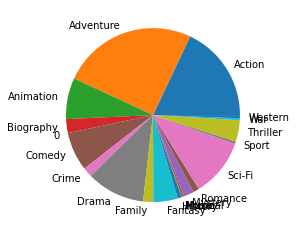

In [98]:
import matplotlib.pyplot as plt
df=pd.read_sql_query("select genre,budget from genre join IMDB on genre.Movie_id=IMDB.Movie_id order by genre",db)

ind=df[df['genre']==""].index.values
df.drop(ind,inplace=True)
df[df['Budget']==""]=0
totalsum=df['Budget'].sum()
percent=[]
uq=df['genre'].unique()
for i in uq:
    per=(df[df['genre']==i].Budget.sum())*100/totalsum
    percent.append(per)
    print(i,format(per,".2f"))
plt.pie(percent,labels=uq)
plt.show()


Action 17.91
Adventure 23.57
Animation 6.77
Biography 3.42
Comedy 7.69
Crime 1.55
Drama 11.96
Family 1.05
Fantasy 5.15
History 1.04
Horror 0.01
Music 0.43
Musical 0.38
Mystery 2.01
Romance 1.45
Sci-Fi 9.95
Sport 0.32
Thriller 4.42
War 0.25
Western 0.65


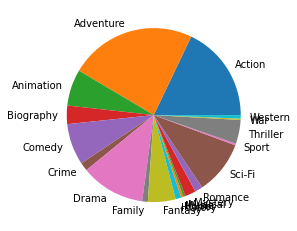

In [100]:
##########################################################
df=pd.read_sql_query("select genre,domestic,Worldwide from genre join earning on genre.Movie_id=earning.Movie_id order by genre",db)

ind=df[df['genre']==""].index.values
df.drop(ind,inplace=True)
df['Prof']=df['Domestic']+df['Worldwide']
uq=df['genre'].unique()
totalsum=df['Prof'].sum()
percent=[]
for i in uq:
    per=(df[df['genre']==i].Prof.sum()*100)/totalsum
    percent.append(per)
    print(i,format(per,".2f"))
plt.pie(percent,labels=uq)
plt.show()

In [115]:
################################################
df=pd.read_sql_query("select title,rating,genre from IMDB join genre on genre.Movie_id=IMDB.Movie_id order by genre",db)
df=df[((df['genre']=='Sci-Fi') | (df['genre']=='Mystery'))& (df['Rating']>=8)]
print(df.iloc[0,0])

Arrival (2016)
